# Project: Wrangling and Analyze Data

## Data Gathering
### In the cell below, gather all three pieces of data for this project and load them in the notebook. Note: the methods required to gather each data are different.

### 1.Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

#### Importing the libraries

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
#Reading the twitter_archive_enhanced.csv

archiveEnhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

#### ---We first import the requests library

In [149]:
import requests as req

In [150]:
with req.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")as rq:
    with open("image-predictions-tsv", "wb") as file:
        file.write(rq.content)

In [151]:
# Reading the image-predictions-tsv created.

imagePredictions_df = pd.read_csv("image-predictions-tsv", sep = "\t")

In [152]:
# outputting the first 5 rows 

imagePredictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Using the jason-txt provided since using tweepy to get additional data failed.

In [153]:
import json

In [154]:
# Opening the file

my_list = []
with open('tweet_json.txt') as file:
    for line in file:
        my_list.append(json.loads(line))

In [155]:
my_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [156]:
additionalTweets_df = pd.DataFrame(my_list, columns=['id', 'retweet_count', 'favorite_count'])

### additionalTweets_df provides the missing values : retweeet_count and favorite_count

## Assessing Data

#### In this section, detect and document at least eight (8) quality issues and two (2) tidiness issue. You must use both visual assessment programmatic assessement to assess the data.

#### Note: pay attention to the following key points when you access the data.
#### 1.You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets
#### 2.Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
#### 3. The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
#### 4. You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## 1. Assessing archiveEnhanced_df

### Visual Assment
- I opened the datasets in Microsoft Excel and detected a few quality issues like missing values.

### Programmatic Assment

In [157]:
# Displauying the first 5 rows.

archiveEnhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### Clearly we can see there are some missing values.

In [158]:
archiveEnhanced_df.shape

(2356, 17)

#### Our dataset has 2356 rows and 17 columns. 

In [159]:
# Getting the unique sources.

archiveEnhanced_df['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [160]:
# Displaying the entire text on the expanded_urls column.


pd.set_option('display.max_colwidth', None)

archiveEnhanced_df['expanded_urls'].sample(10)

1813                                                                                                                                                                                                    https://twitter.com/dog_rates/status/676776431406465024/video/1
1732                                                                    https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679828447187857408/photo/1
2131                                                                                                                                                                                                    https://twitter.com/dog_rates/status/670086499208155136/photo/1
1697                                                                                                                                                                                                    https://

##### There are some repeated urls. We need to change that.

In [161]:
# checking the timestamp datatype
archiveEnhanced_df['timestamp'].dtypes

dtype('O')

##### -dtype('O') means that it is a pandas string. Timestamps should be in the date datatype.

In [162]:
#checking for duplicates

archiveEnhanced_df.duplicated().any()

False

#### There are no duplicates

In [163]:
# Checking for unique values in rating_numerator

archiveEnhanced_df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [164]:
# Checking for unique values in rating_denominator

archiveEnhanced_df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

#### There are rating_denominator that are not eaual to 10. We need to change them to 10.

In [165]:
# checking for counts of the names

archiveEnhanced_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

#### There is inconsistency in the name column. Some names begin in small letters. We need to change that consistency issue.

## 2. Assessing imagePredictions_df

In [166]:
# Displaying the first 5 rows.

imagePredictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [167]:
imagePredictions_df.shape

(2075, 12)

#### Our dataset has 2075 rows and 12 columns. 

In [168]:
imagePredictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### There are no missing values in our dataset. However, we have incorrect datatype in the tweet_id. There are non-descriptive column headers also.

In [169]:
imagePredictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### tweet_id should be changed to a string datatype.

In [170]:
# Getting the counts of img-num. It has only 4 counts so we could make it a categorical.

imagePredictions_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### checking the datatypes

In [171]:
imagePredictions_df['img_num'].dtype

dtype('int64')

In [172]:
imagePredictions_df['p1'].dtype

dtype('O')

In [173]:
imagePredictions_df['p2'].dtype

dtype('O')

In [174]:
imagePredictions_df['p3'].dtype

dtype('O')

## 3. Assessing additionalTweets_df

In [175]:
# Displaying the 5 first rows.

additionalTweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7019,33843
1,892177421306343426,5303,29360
2,891815181378084864,3486,22077
3,891689557279858688,7232,36974
4,891327558926688256,7772,35344


In [176]:
# getting the shape of the dataframe.

additionalTweets_df.shape

(2326, 3)

#### Our dataframe has 2326 rows and only 3 columns.

In [177]:
additionalTweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


#### id should be made tweet_id to match the other ids. its datatype should also be made a string.

In [178]:
additionalTweets_df.describe()

,id,retweet_count,favorite_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.417612e+17,2474.404127,7059.825881
std,6.820537e+16,4190.952556,10974.567996
min,6.660209e+17,1.000000,0.000000
25%,6.780814e+17,495.250000,1224.250000
50%,7.178159e+17,1149.500000,3053.000000
75%,7.986402e+17,2865.750000,8599.500000
max,8.924206e+17,70838.000000,145027.000000


## Quality issues

### 1. archiveEnhanced_df

1. icorrect datatypes (in the tweet_id, timestamp columns.)
2. Inconsistent data. (there are rows with retweets and replies information yet we want only the original tweets.)
3. Non-descriptive column header in the timestamp column. It should be changed to a more descriptive header like tweet_Date.
4. Extract the actual source from the source column.
5. Some rating_denominators are not equal to 10.
6. Inconstinstency in the name column.
#### imagePredictions_df
7. Non-descriptive column headers in p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, and p3_dog 
8. incorrect datatype in tweet_id 

#### additionalTweets_df
9. tweet_id should have string datatype




## Tidiness issues
1. One variable has been split into 4 columns(doggo, floofer,puppo, pupper).These columns should be merged to a single column named dog_stage
2. Dropping columns with so many missing values.
3. Derive ratings column based on the rating_numerator and drating_denominator
4. 3 datasets have information of the same thing(dogs). The 3 datasets should be merged.



# Cleaning Data

#### In this section, clean **all** of the issues you documented while assessing.

#### **Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [179]:
# Make copies of original pieces of data
archiveEnhanced_df_clean = archiveEnhanced_df.copy()
imagePredictions_df_clean = imagePredictions_df.copy()
additionalTweets_df_clean = additionalTweets_df.copy()

#### #1. Define:

icorrect datatypes (in the tweet_id, timestamp columns.)

#### Code



In [180]:
archiveEnhanced_df_clean['tweet_id'] = archiveEnhanced_df_clean['tweet_id'].astype(str)
imagePredictions_df_clean['tweet_id'] = imagePredictions_df_clean['tweet_id'].astype(str)
archiveEnhanced_df['timestamp'] = pd.to_datetime(archiveEnhanced_df['timestamp'])

#### Test

In [181]:
archiveEnhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### #2. Define:
 Inconsistent data. (there are rows with retweets and replies information yet we want only the original tweets.)

#### Code
We had previously queried out rows that either contain retweets and replies. We will just drop these rows.

In [182]:
# Geting the rows with retweets_or_replies

retweets_or_replies = archiveEnhanced_df_clean[(archiveEnhanced_df_clean['in_reply_to_user_id'].notnull()) | 
          (archiveEnhanced_df_clean['retweeted_status_id'].notnull())] 

# dropping the rows with retweets_or_replies
archiveEnhanced_df_clean.drop(retweets_or_replies.index, axis=0, inplace =True)

#### Test

In [183]:

archiveEnhanced_df_clean[(archiveEnhanced_df_clean['in_reply_to_user_id'].notnull()) | 
          (archiveEnhanced_df_clean['retweeted_status_id'].notnull())] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### #3. Define:
 Non-descriptive column header in the timestamp column. It should be changed to a more descriptive header like tweet_Date.

#### Code

In [184]:
archiveEnhanced_df_clean = archiveEnhanced_df_clean.rename(columns = {'timestamp': 'tweet_date'})

#### Test

In [185]:
archiveEnhanced_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'tweet_date', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

##### #4 Define.
Extract the actual source from the source column.

#### Code

In [186]:
# Getting the whole source text 

pd.set_option('display.max_colwidth', -1)
archiveEnhanced_df_clean.source

C:\Users\mwendwa\anaconda3\envs\Udacity_Projects\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [187]:
# Doing the actual extraction

archiveEnhanced_df_clean.source = archiveEnhanced_df_clean.source.str.split('>', expand=True)[1].str.split('<', expand=True)[0]
archiveEnhanced_df_clean.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2097, dtype: object

#### Test

In [188]:
archiveEnhanced_df_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

#### #5. Define:
Some rating_denominators are not equal to 10.

#### Code

In [189]:
# Getting the rating_denominator that aren't equal to 10

Denominator_Not10 = archiveEnhanced_df_clean.query('rating_denominator != 10').index

for index in Denominator_Not10:
    
    # Replacing them with 10
    archiveEnhanced_df_clean.at[index,'rating_denominator'] = 10

#### Test

In [190]:
archiveEnhanced_df_clean.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### #6.Define

Inconstinstency in the name column.

#### Code

In [191]:
# Getting the names starting with smaller letters.

los = list(archiveEnhanced_df_clean.name)
loers = []

for i in los:
    if (i.islower()) | (i == 'None'):
        if i in loers:
            continue
        loers.append(i)

In [192]:
# Replacing them.

archiveEnhanced_df_clean['name'] = archiveEnhanced_df_clean['name'].apply(lambda x: np.nan if x in loers else x)

#### Test`

In [193]:
archiveEnhanced_df_clean[archiveEnhanced_df_clean['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


####  #7. Define:
 Non-descriptive column headers in p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, and p3_dog

#### Code

In [194]:
imagePredictions_df_clean = imagePredictions_df_clean.rename(columns = {'p1' : 'prediction1',
                                          'p2' : 'prediction2',
                                          'p3' : 'prediction3',
                                          'p1_conf' : 'prediction1_confidence',
                                          'p2_conf' : 'prediction2_confidence',
                                          'p3_conf' : 'prediction3_confidence',
                                          'p1_dog' : 'prediction1_dog_breed_bool',
                                          'p2_dog' : 'prediction2_dog_breed_bool',
                                          'p3_dog' : 'prediction3_dog_breed_bool'})

#### Test

In [195]:
imagePredictions_df_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction1',
       'prediction1_confidence', 'prediction1_dog_breed_bool', 'prediction2',
       'prediction2_confidence', 'prediction2_dog_breed_bool', 'prediction3',
       'prediction3_confidence', 'prediction3_dog_breed_bool'],
      dtype='object')

####  #8. Define:
 id in the additional_tweets_df should be tweet_id to make it uniform

#### Code

In [196]:
additionalTweets_df_clean = additionalTweets_df_clean.rename(columns = {'id' : 'tweet_id'})

#### Test

In [197]:
additionalTweets_df_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

####  #9. Define:
 tweet_id should have string datatype

#### Code

In [198]:
additionalTweets_df_clean['tweet_id'] = additionalTweets_df_clean['tweet_id'].astype(str)

#### Test

In [199]:
additionalTweets_df_clean['tweet_id'].dtype

dtype('O')

## Cleaning Tidiness issues

#### #1. Define:
 One variable has been split into 4 columns(doggo, floofer,puppo, pupper).These columns should be merged to a single column named dog_stage

#### code

In [200]:
# We shall reextract the values from text column since they were originally extracted there.

archiveEnhanced_df_clean['dog_stage'] = archiveEnhanced_df_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [201]:
archiveEnhanced_df_clean['dog_stage'].value_counts()

pupper     240
doggo      80 
puppo      29 
floofer    4  
Name: dog_stage, dtype: int64

#### #2. Define:
Dropping columns with so many missing values.

In [202]:
archiveEnhanced_df_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

### Test

In [203]:
archiveEnhanced_df_clean.columns

Index(['tweet_id', 'tweet_date', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

#### #3. Define:
Create a new column called ratings based on rating_numerator and rating_denominator and delete the rating_numerator and rating_denominator

#### Code

In [204]:
archiveEnhanced_df_clean['ratings'] = (archiveEnhanced_df_clean['rating_numerator'] / archiveEnhanced_df_clean['rating_denominator'])

In [205]:
archiveEnhanced_df_clean

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,ratings
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,1.2
...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,NaN,0.5
2352,666044226329800704,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,NaN,NaN,0.6
2353,666033412701032449,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,NaN,NaN,0.9
2354,666029285002620928,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,NaN,NaN,0.7


#### Test

#### #4. Define:
 3 datasets have information of the same thing(dogs). The 3 datasets should be merged.

#### Code

In [206]:
# define a function to merge the datasets

from functools import reduce

def merge_datasets(data, col):
    
    merged_datasets = reduce(lambda  left,right: pd.merge(left,right,on= col, how='outer'), data)
    return merged_datasets

In [207]:
dataframes = [archiveEnhanced_df_clean, imagePredictions_df_clean, additionalTweets_df_clean]

WeRateDogs_master_df = merge_datasets(dataframes, 'tweet_id')

#### Test

In [208]:
WeRateDogs_master_df.shape

(2345, 23)

In [211]:
WeRateDogs_master_df

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,ratings,...,prediction1_confidence,prediction1_dog_breed_bool,prediction2,prediction2_confidence,prediction2_dog_breed_bool,prediction3,prediction3_confidence,prediction3_dog_breed_bool,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,1.3,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7019.0,33843.0
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,1.3,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5303.0,29360.0
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,1.2,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3486.0,22077.0
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,1.3,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7232.0,36974.0
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,1.2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7772.0,35344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,673716320723169284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,670.0,2790.0
2341,671550332464455680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.0,811.0
2342,669684865554620416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,449.0
2343,668967877119254528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,127.0


## Storing Data

#### Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [213]:
WeRateDogs_master_df.to_csv('twitter_archive_master.csv')

# Re-reading the saved dataframe.
WeRateDogs_master = pd.read_csv('twitter_archive_master.csv')

In [215]:
WeRateDogs_master.head()

,Unnamed: 0,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,prediction1_confidence,prediction1_dog_breed_bool,prediction2,prediction2_confidence,prediction2_dog_breed_bool,prediction3,prediction3_confidence,prediction3_dog_breed_bool,retweet_count,favorite_count
0,0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7019.0,33843.0
1,1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5303.0,29360.0
2,2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3486.0,22077.0
3,3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7232.0,36974.0
4,4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7772.0,35344.0


# Analyzing and Visualizing Data
#### In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualization.

### #1. What is the correlation between retweet_count and favourite_count?

In [222]:
# Calculating a correlation coefficient between retweet_count and favourite_count of movies.
correlation = WeRateDogs_master['retweet_count'].corr(WeRateDogs_master['favorite_count'])
correlation

0.8016386100405121

In [262]:
'''
 This function plots the regplot and prints the correlation
 between the two variables passed as parameters
'''

def plot_regplot_and_generate_correlation(x, y, df):
  sns.regplot(x=x, y=y, data=df, ci=None)
  plt.title(f"{x.capitalize()} against {y.capitalize()}")
  plt.show()

  correlation = df[x].corr(df[y])
  print(f"The Correlation between {x.capitalize()} and {y.capitalize()} is {correlation}")

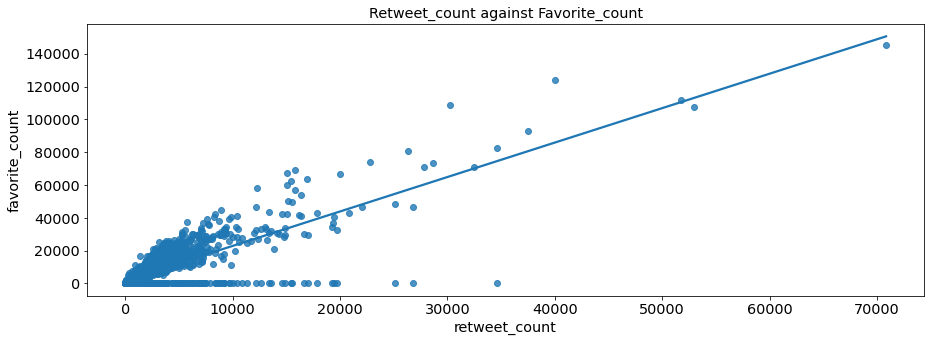

The Correlation between Retweet_count and Favorite_count is 0.8016386100405121


In [263]:
plot_regplot_and_generate_correlation('retweet_count', 'favorite_count', WeRateDogs_master )

### #2a.Is there a relationship between ratings and favorite count?

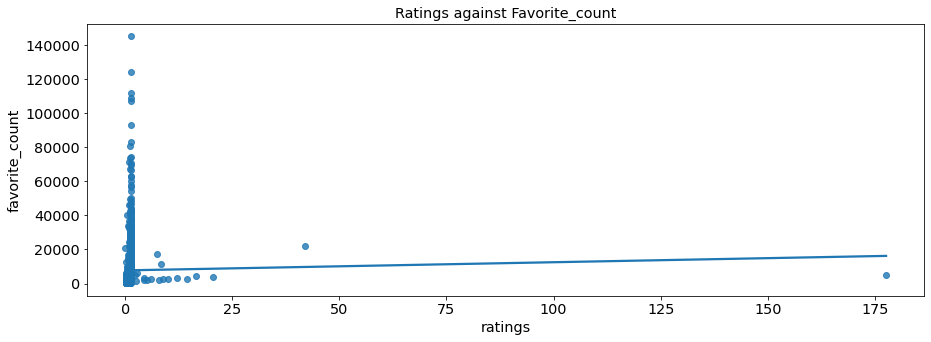

The Correlation between Ratings and Favorite_count is 0.017065391588601143


In [265]:
# calling the function to plot a regplot and calculate the correlation coefficient.

plot_regplot_and_generate_correlation('ratings', 'favorite_count', WeRateDogs_master )

#### The correlation between ratings and favorite_count is 0.017065391588601143. This is a weak correlation. This means there is hardly an relationship between the two.

### #2b. What is the relationship between ratings and retweet count?

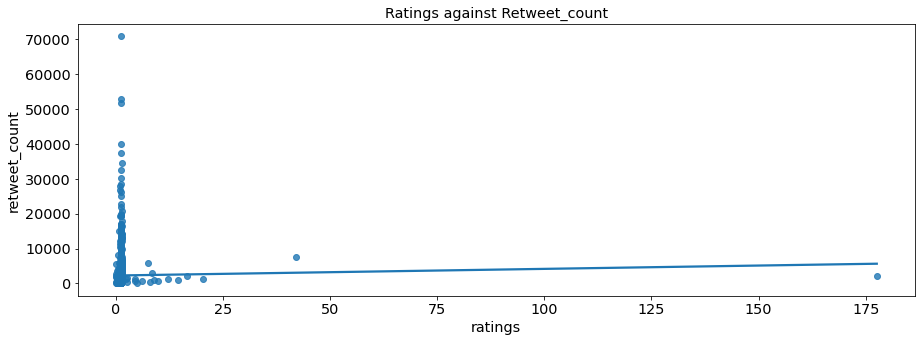

The Correlation between Ratings and Retweet_count is 0.019037709139975427


In [276]:
# calling the function to plot a regplot and calculate the correlation coefficient.

plot_regplot_and_generate_correlation('ratings', 'retweet_count', WeRateDogs_master )

#### The correlation between ratings and retweet_count is 0.019037709139975427. This is a weak correlation. This means there is hardly an relationship between the two.

#### #3. What is the mean favourite_count for all the dog_stages?

In [225]:
mean_favourite_count = WeRateDogs_master.groupby('dog_stage')['favorite_count'].mean()
mean_favourite_count

dog_stage
doggo      14683.468354
floofer    15859.500000
pupper     6128.312500 
puppo      20363.250000
Name: favorite_count, dtype: float64

### #4. What dog_stage is the most tweeted?

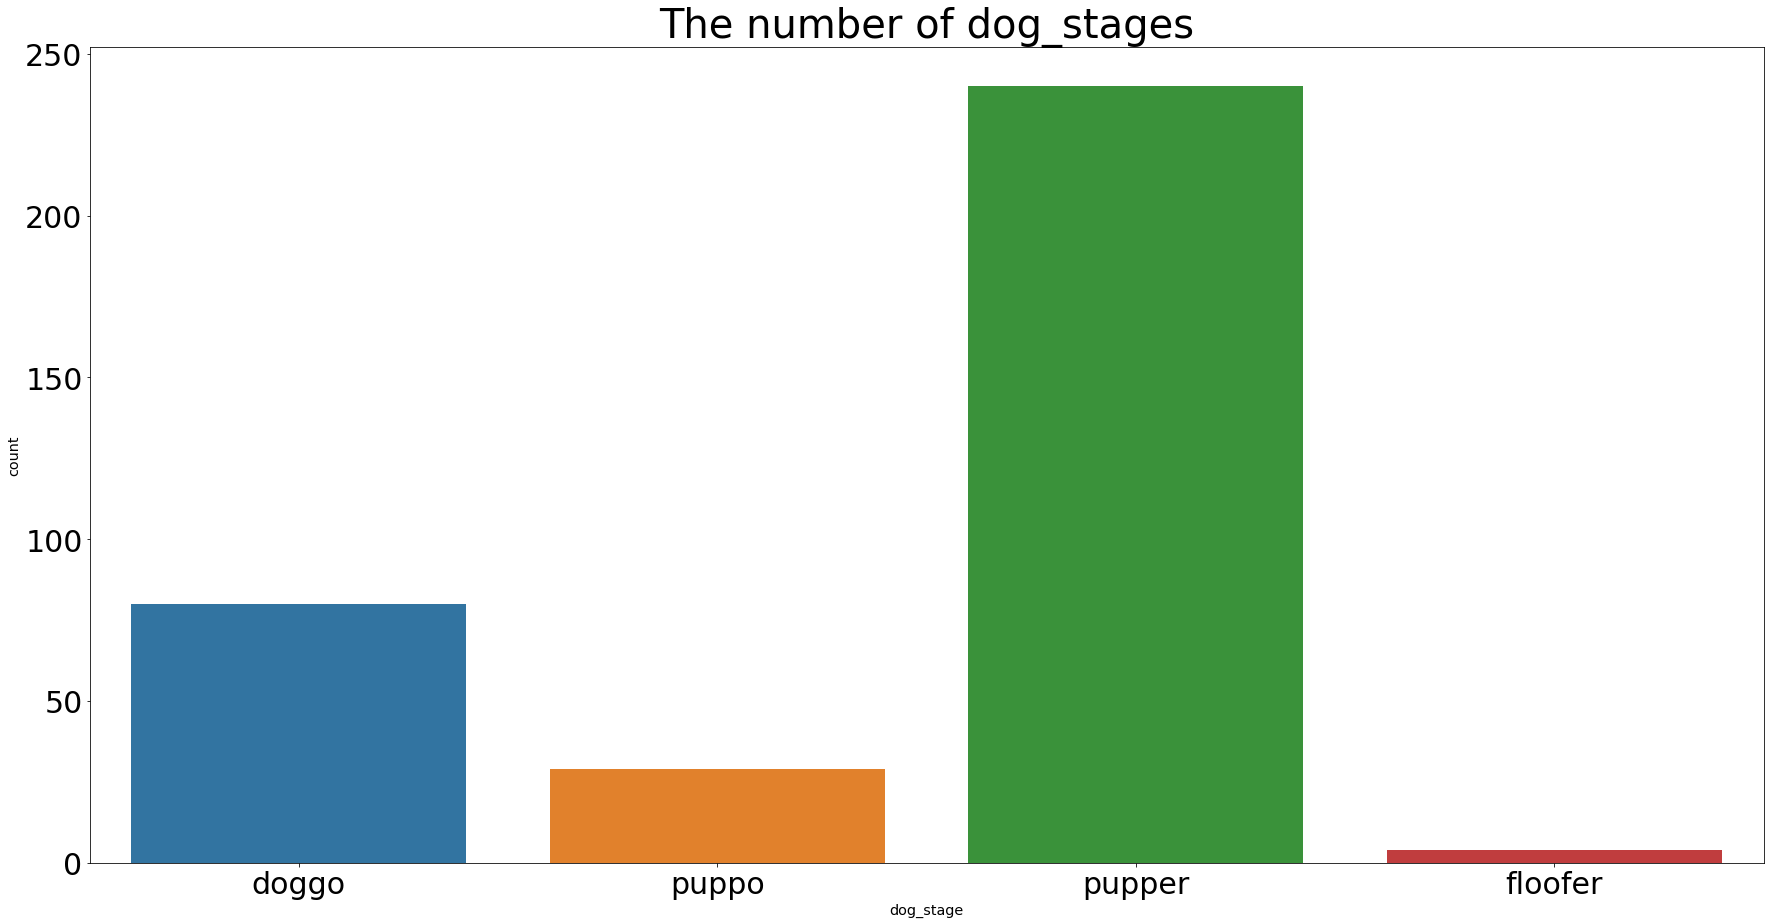

In [242]:
plt.figure(figsize=(30,15))
sns.countplot(x = 'dog_stage', data= WeRateDogs_master )
plt.title('The number of dog_stages', fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.show;

### Most pictures of dogs that are tweeted are pictures of puppers.

### #5. Which prediction mode was most accurate?

In [255]:
WeRateDogs_master['prediction1_confidence'].describe()

count    2075.000000
mean     0.594548   
std      0.271174   
min      0.044333   
25%      0.364412   
50%      0.588230   
75%      0.843855   
max      1.000000   
Name: prediction1_confidence, dtype: float64

In [260]:
WeRateDogs_master['prediction2_confidence'].describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: prediction2_confidence, dtype: float64

In [261]:
WeRateDogs_master['prediction3_confidence'].describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: prediction3_confidence, dtype: float64

#### From the summary statistics above, prediction 1 had a better prediction_confidence.

### #6 Which source has the highest users?

<AxesSubplot:>

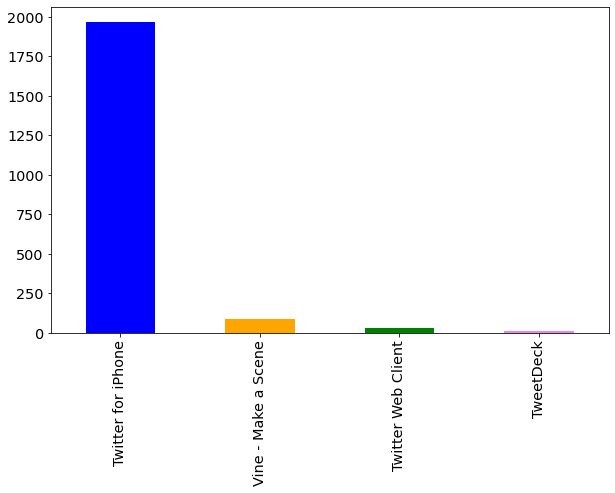

In [275]:
WeRateDogs_master.source.value_counts().plot(kind = 'bar', figsize = (10, 6), color = ['blue', 'orange', 'green', 'violet'])

### #7. What dog stages are most liked?

Text(0, 0.5, 'favorite_count')

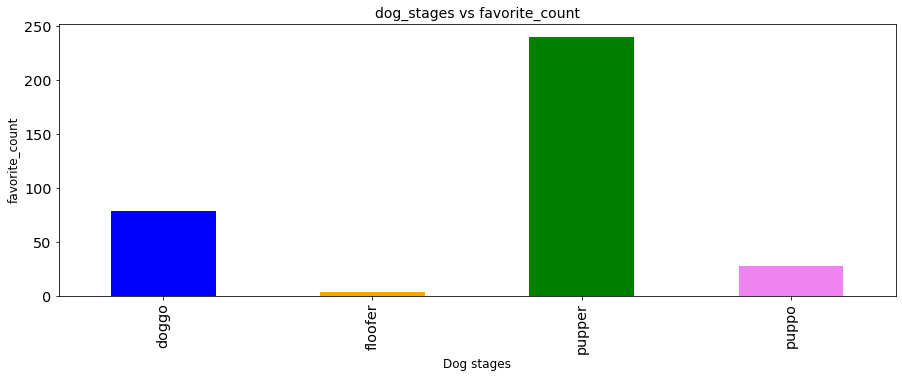

In [271]:
WeRateDogs_master.groupby('dog_stage')['favorite_count'].count().plot(kind = 'bar', color = ['blue', 'orange', 'green', 'violet'])
plt.title('dog_stages vs favorite_count', fontsize = 14)
plt.xlabel('Dog stages', fontsize = 12)
plt.ylabel('favorite_count', fontsize = 12)

### #8. What dog stages are most retweeted?

Text(0, 0.5, 'favorite_count')

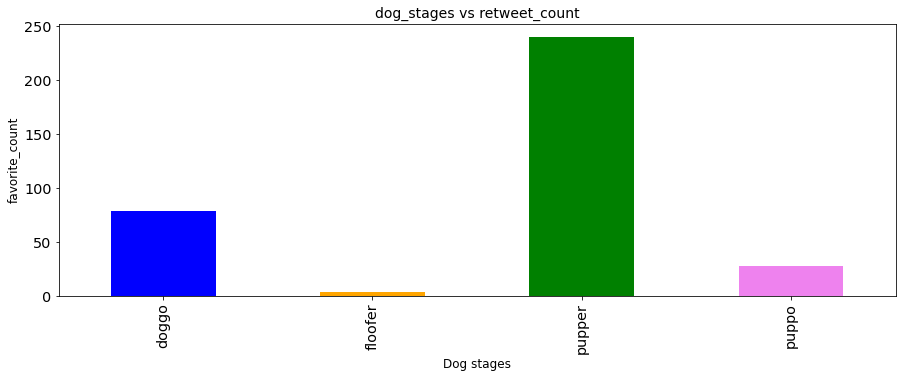

In [272]:
WeRateDogs_master.groupby('dog_stage')['retweet_count'].count().plot(kind = 'bar', color = ['blue', 'orange', 'green', 'violet'])
plt.title('dog_stages vs retweet_count', fontsize = 14)
plt.xlabel('Dog stages', fontsize = 12)
plt.ylabel('favorite_count', fontsize = 12)

## Insights:
#### 1.  The relationship between Retweet_count and Favorite_count is strong. This shows that if a user likes a post on twitter; they will most probably repost it.

#### 2. Pupper was the most tweeted dog_stage

#### 3. Prediction 1 had a better prediction_confidence.

#### 4. Most people use tweeter for iphone

#### 5. Pupper is the most liked and retweeted dog_stage.

#### 6 Ratings  affects neither the likes nor the retweets that a dog gets.


## Visualization

### The visualizations are included in the analysis